In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
num_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [0]:
output_dim = 10
input_shape = input_shape
batch_size = 256
epochs = 20
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test
def param():
    output_dim = 10
    input_shape = x_train.shape[1]
    batch_size = 256
    epochs = 20
    x_train = x_train
    y_train = y_train
    x_test = x_test
    y_test = y_test

In [0]:
import matplotlib.pyplot as plt

In [0]:
def hyper_param_tunning(nb_filter, kernel_size, max_pool_size, drop_rate,  param):
  
    model = Sequential()
    
    model.add(Conv2D(nb_filter, kernel_size=kernel_size,
                     activation='relu',
                     input_shape=input_shape))

    model.add(Conv2D(nb_filter, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=max_pool_size))
    model.add(Dropout(drop_rate))

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(drop_rate))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    
    model = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      validation_split = 0.20,        
                      epochs=epochs,
                      verbose=0,
                      validation_data=(x_test, y_test))
    
    
    return model

In [0]:
from tqdm import tqdm_notebook as tqdm
from keras.activations import relu, tanh, sigmoid
import numpy as np

In [6]:
kernel_size1 = [ (2,2), (3,3), (4,4) ]
nb_filter1 = [6, 8, 10]
max_pool_size1 = [ (2,2), (3,3), (4,4) ]
drop_rate1 = [0.2, 0.5, 0.8]

df1 = pd.DataFrame(columns = ["Number of filter","kernel size","max pool size","drop rate","test acc","val acc"],
                  index = ["model_" + str(x) for x in range(1,82)]
                 )
c = 0
for i, nb_filter in tqdm(enumerate(nb_filter1)):
    for j, kernel_size in tqdm(enumerate(kernel_size1)):
        for k, max_pool_size in enumerate(max_pool_size1):
            for p, drop_rate in enumerate(drop_rate1):
              
                import warnings
                warnings.filterwarnings("ignore")
                             
                model = hyper_param_tunning(nb_filter, kernel_size, max_pool_size, drop_rate, param)
                
                ty = np.round((max(model.history['acc']))*100, 2)
                index = model.history['acc'].index(max(model.history['acc']))
                    
                vy = np.round(((model.history['val_acc'][index]))*100, 2)
                   
                df1.iloc[c, 0]  = nb_filter
                df1.iloc[c, 1]  = kernel_size
                df1.iloc[c, 2]  = max_pool_size
                df1.iloc[c, 3]  = drop_rate
                df1.iloc[c, 4]  = ty
                df1.iloc[c, 5]  = vy
                c = c+1

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
import pickle
pickle_out = open("df1.pickle","wb")
pickle.dump(df1, pickle_out)

pickle_out.close()

In [8]:
df1

,Number of filter,kernel size,max pool size,drop rate,test acc,val acc
model_1,6,"(2, 2)","(2, 2)",0.2,98.93,98.7
model_2,6,"(2, 2)","(2, 2)",0.5,96.65,98.75
model_3,6,"(2, 2)","(2, 2)",0.8,82.88,96.01
model_4,6,"(2, 2)","(3, 3)",0.2,98.19,98.76
model_5,6,"(2, 2)","(3, 3)",0.5,93.45,97.96
model_6,6,"(2, 2)","(3, 3)",0.8,73.32,94.59
model_7,6,"(2, 2)","(4, 4)",0.2,97.44,98.71
model_8,6,"(2, 2)","(4, 4)",0.5,92.02,98
model_9,6,"(2, 2)","(4, 4)",0.8,68.12,93.89
model_10,6,"(3, 3)","(2, 2)",0.2,99.23,99.01


In [9]:

sorted_df1 = df1.sort_values('val acc', ascending=False)
sorted_df1

,Number of filter,kernel size,max pool size,drop rate,test acc,val acc
model_79,10,"(4, 4)","(4, 4)",0.2,98.82,99.35
model_67,10,"(3, 3)","(3, 3)",0.2,99.22,99.31
model_46,8,"(4, 4)","(2, 2)",0.2,99.48,99.21
model_13,6,"(3, 3)","(3, 3)",0.2,98.65,99.19
model_47,8,"(4, 4)","(2, 2)",0.5,97.99,99.18
model_52,8,"(4, 4)","(4, 4)",0.2,98.53,99.17
model_70,10,"(3, 3)","(4, 4)",0.2,98.8,99.16
model_77,10,"(4, 4)","(3, 3)",0.5,97.47,99.15
model_64,10,"(3, 3)","(2, 2)",0.2,99.52,99.15
model_43,8,"(3, 3)","(4, 4)",0.2,98.57,99.14


In [11]:
print("model_46 is best becuase it has less parameter")

model_46 is best becuase it has less parameter


In [13]:
df1.loc['model_46']

Number of filter         8
kernel size         (4, 4)
max pool size       (2, 2)
drop rate              0.2
test acc             99.48
val acc              99.21
Name: model_46, dtype: object

In [0]:
model = hyper_param_tunning(8, (4,4), (2,2), 0.2, param)

In [0]:
ty1 = np.round([item * 100 for item in model.history['acc']], 2)
vy1 = np.round([item * 100 for item in model.history['val_acc']], 2)

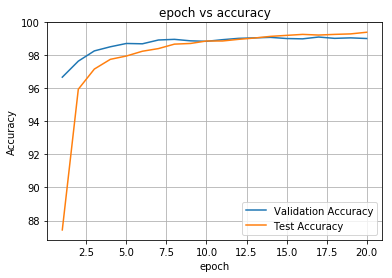

In [16]:
plt.plot(range(1,21), vy1, label = 'Validation Accuracy')
plt.plot(range(1, 21), ty1, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("epoch vs accuracy")
plt.show()

**3 layer CNN**

In [0]:
def hyper_param_tunning(nb_filter, kernel_size, max_pool_size, drop_rate,  param):
  
    model = Sequential()
    
    model.add(Conv2D(nb_filter, kernel_size=kernel_size,
                     activation='relu',
                     input_shape=input_shape))

    model.add(Conv2D(nb_filter, kernel_size, activation='relu'))
    
    
    
    model.add(Conv2D(nb_filter, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=max_pool_size))
    

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(drop_rate))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    
    model = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      validation_split = 0.20,        
                      epochs=epochs,
                      verbose=0,
                      validation_data=(x_test, y_test))
    
    
    return model

In [7]:
kernel_size1 = [ (4,4), (3,3), (2,2) ]
nb_filter1 = [16, 12,8 ]
max_pool_size1 = [ (4,4), (3,3), (2,2) ]
drop_rate1 = [0.05, 0.04, 0.02]

df2 = pd.DataFrame(columns = ["Number of filter","kernel size","max pool size","drop rate","test acc","val acc"],
                  index = ["model_" + str(x) for x in range(1,82)]
                 )
c = 0
for i, nb_filter in tqdm(enumerate(nb_filter1)):
    for j, kernel_size in tqdm(enumerate(kernel_size1)):
        for k, max_pool_size in tqdm(enumerate(max_pool_size1)):
            for p, drop_rate in tqdm(enumerate(drop_rate1)):
              
                import warnings
                warnings.filterwarnings("ignore")
                             
                model = hyper_param_tunning(nb_filter, kernel_size, max_pool_size, drop_rate, param)
                
                ty = np.round((max(model.history['acc']))*100, 2)
                index = model.history['acc'].index(max(model.history['acc']))
                    
                vy = np.round(((model.history['val_acc'][index]))*100, 2)
                   
                df2.iloc[c, 0]  = nb_filter
                df2.iloc[c, 1]  = kernel_size
                df2.iloc[c, 2]  = max_pool_size
                df2.iloc[c, 3]  = drop_rate
                df2.iloc[c, 4]  = ty
                df2.iloc[c, 5]  = vy
                c = c+1

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
import pickle
pickle_out = open("df2.pickle","wb")
pickle.dump(df2, pickle_out)

pickle_out.close()

In [28]:
df2

,Number of filter,kernel size,max pool size,drop rate,test acc,val acc
model_1,16,"(4, 4)","(4, 4)",0.05,99.66,99.07
model_2,16,"(4, 4)","(4, 4)",0.04,99.66,99.06
model_3,16,"(4, 4)","(4, 4)",0.02,99.73,98.91
model_4,16,"(4, 4)","(3, 3)",0.05,99.82,99.11
model_5,16,"(4, 4)","(3, 3)",0.04,99.83,99.16
model_6,16,"(4, 4)","(3, 3)",0.02,99.82,99.08
model_7,16,"(4, 4)","(2, 2)",0.05,99.86,99.17
model_8,16,"(4, 4)","(2, 2)",0.04,99.82,99.06
model_9,16,"(4, 4)","(2, 2)",0.02,99.86,99.14
model_10,16,"(3, 3)","(4, 4)",0.05,99.69,99.13


In [29]:
sorted_df2 = df2.sort_values('val acc', ascending = False)
sorted_df2

,Number of filter,kernel size,max pool size,drop rate,test acc,val acc
model_18,16,"(3, 3)","(2, 2)",0.02,99.92,99.21
model_7,16,"(4, 4)","(2, 2)",0.05,99.86,99.17
model_5,16,"(4, 4)","(3, 3)",0.04,99.83,99.16
model_38,12,"(3, 3)","(4, 4)",0.04,99.73,99.15
model_9,16,"(4, 4)","(2, 2)",0.02,99.86,99.14
model_10,16,"(3, 3)","(4, 4)",0.05,99.69,99.13
model_31,12,"(4, 4)","(3, 3)",0.05,99.83,99.13
model_37,12,"(3, 3)","(4, 4)",0.05,99.69,99.12
model_4,16,"(4, 4)","(3, 3)",0.05,99.82,99.11
model_34,12,"(4, 4)","(2, 2)",0.05,99.84,99.1


In [30]:
print("model_18 is best because it has less parameter")

model_18 is best because it has less parameter


In [31]:
df2.loc['model_18']

Number of filter        16
kernel size         (3, 3)
max pool size       (2, 2)
drop rate             0.02
test acc             99.92
val acc              99.21
Name: model_18, dtype: object

In [0]:
model = hyper_param_tunning(16, (3,3), (2,2), 0.02, param)

In [0]:
ty2 = np.round([item * 100 for item in model.history['acc']], 2)
vy2 = np.round([item * 100 for item in model.history['val_acc']], 2)

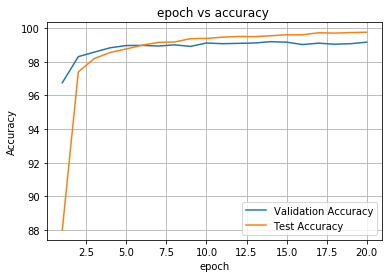

In [35]:
plt.plot(range(1,21), vy2, label = 'Validation Accuracy')
plt.plot(range(1,21), ty2, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("epoch vs accuracy ")
plt.show()

**5 layer CNN**

In [0]:
def hyper_param_tunning(nb_filter, kernel_size, max_pool_size, drop_rate,  param):
  
    model = Sequential()
    
    model.add(Conv2D(nb_filter, kernel_size=kernel_size,
                     activation='relu',
                     input_shape=input_shape))

    model.add(Conv2D(nb_filter, kernel_size, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=max_pool_size, padding = 'same'))
    model.add(Dropout(drop_rate))
    
    model.add(Conv2D(nb_filter, kernel_size, activation='relu', padding = 'same'))
    model.add(Dropout(drop_rate))
    
    
    model.add(Conv2D(nb_filter, kernel_size, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=max_pool_size, padding = 'same'))
    
    
    model.add(Conv2D(nb_filter, kernel_size, activation='relu', padding = 'same'))
    

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(drop_rate))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    
    model = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      validation_split = 0.20,        
                      epochs=epochs,
                      verbose=0,
                      validation_data=(x_test, y_test))
    
    
    return model

In [9]:
kernel_size1 = [ (4,4), (3,3), (2,2) ]
nb_filter1 = [10, 8, 6]
max_pool_size1 = [ (4,4), (3,3), (2,2) ]
drop_rate1 = [0.2, 0.15, 0.1]

df3 = pd.DataFrame(columns = ["Number of filter","kernel size","max pool size","drop rate","test acc","val acc"],
                  index = ["model_" + str(x) for x in range(1,82)]
                 )
c = 0
for i, nb_filter in tqdm(enumerate(nb_filter1)):
    for j, kernel_size in tqdm(enumerate(kernel_size1)):
        for k, max_pool_size in enumerate(max_pool_size1):
            for p, drop_rate in enumerate(drop_rate1):
              
                import warnings
                warnings.filterwarnings("ignore")
                             
                model = hyper_param_tunning(nb_filter, kernel_size, max_pool_size, drop_rate, param)
                
                ty = np.round((max(model.history['acc']))*100, 2)
                index = model.history['acc'].index(max(model.history['acc']))
                    
                vy = np.round(((model.history['val_acc'][index]))*100, 2)
                   
                df3.iloc[c, 0]  = nb_filter
                df3.iloc[c, 1]  = kernel_size
                df3.iloc[c, 2]  = max_pool_size
                df3.iloc[c, 3]  = drop_rate
                df3.iloc[c, 4]  = ty
                df3.iloc[c, 5]  = vy
                c = c+1

In [0]:
import pickle
pickle_out = open("df3.pickle","wb")
pickle.dump(df3, pickle_out)

pickle_out.close()

In [12]:
df3

,Number of filter,kernel size,max pool size,drop rate,test acc,val acc
model_1,10,"(2, 2)","(2, 2)",0.2,99.71,98.76
model_2,10,"(2, 2)","(2, 2)",0.15,99.74,98.87
model_3,10,"(2, 2)","(2, 2)",0.1,99.81,98.87
model_4,10,"(2, 2)","(3, 3)",0.2,99.44,98.85
model_5,10,"(2, 2)","(3, 3)",0.15,99.64,98.98
model_6,10,"(2, 2)","(3, 3)",0.1,99.72,98.85
model_7,10,"(2, 2)","(2, 2)",0.2,99.7,98.88
model_8,10,"(2, 2)","(2, 2)",0.15,99.78,98.85
model_9,10,"(2, 2)","(2, 2)",0.1,99.87,98.71
model_10,10,"(3, 3)","(2, 2)",0.2,99.69,99.16


In [15]:
sorted_df3 = df3.sort_values('val acc', ascending = False)
sorted_df3

,Number of filter,kernel size,max pool size,drop rate,test acc,val acc
model_15,10,"(3, 3)","(3, 3)",0.1,99.7,99.17
model_43,8,"(3, 3)","(2, 2)",0.2,99.63,99.17
model_13,10,"(3, 3)","(3, 3)",0.2,99.59,99.16
model_10,10,"(3, 3)","(2, 2)",0.2,99.69,99.16
model_38,8,"(3, 3)","(2, 2)",0.15,99.69,99.15
model_37,8,"(3, 3)","(2, 2)",0.2,99.69,99.11
model_42,8,"(3, 3)","(3, 3)",0.1,99.59,99.11
model_14,10,"(3, 3)","(3, 3)",0.15,99.64,99.09
model_32,8,"(2, 2)","(3, 3)",0.15,99.55,99.08
model_11,10,"(3, 3)","(2, 2)",0.15,99.8,99.08


In [17]:
print("Model_43 is best because it has less parameter")

Model_43 is best because it has less parameter


In [22]:
df3.loc['model_43']

Number of filter         8
kernel size         (3, 3)
max pool size       (2, 2)
drop rate              0.2
test acc             99.63
val acc              99.17
Name: model_43, dtype: object

In [0]:
model = hyper_param_tunning(8, (3,3), (2,2), 0.2, param)

In [0]:
ty3 = np.round([item * 100 for item in model.history['acc']], 2)
vy3 = np.round([item * 100 for item in model.history['val_acc']], 2)

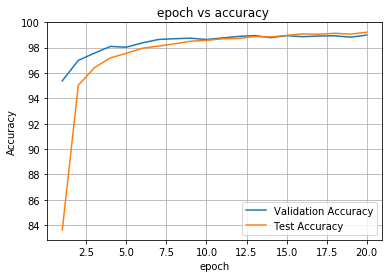

In [27]:
plt.plot(range(1,21), vy3, label = 'Validation Accuracy')
plt.plot(range(1, 21), ty3, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("epoch vs accuracy ")
plt.show()

In [18]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "layer", " number of filter", "kernel size", "max pool size", "drop rate", "test acc", "val acc"]

x.add_row(["1", 2, 8, (4,4), (2,2),0.2, 99.48, 99.21 ])
x.add_row(["2", 3, 16, (3,3), (2,2), 0.02, 99.92, 99.21 ])
x.add_row(["3", 5, 8, (3,3), (2,2), 0.2, 99.63, 99.17 ])
 
print(x)

+-------+-------+-------------------+-------------+---------------+-----------+----------+---------+
| Model | layer |  number of filter | kernel size | max pool size | drop rate | test acc | val acc |
+-------+-------+-------------------+-------------+---------------+-----------+----------+---------+
|   1   |   2   |         8         |    (4, 4)   |     (2, 2)    |    0.2    |  99.48   |  99.21  |
|   2   |   3   |         16        |    (3, 3)   |     (2, 2)    |    0.02   |  99.92   |  99.21  |
|   3   |   5   |         8         |    (3, 3)   |     (2, 2)    |    0.2    |  99.63   |  99.17  |
+-------+-------+-------------------+-------------+---------------+-----------+----------+---------+


**Conclusion**

* we have 3 architectire with different layer and drop out rate with 
  batch normalization
* After that we tune hyperparameter with drop out and activation function
* Actually all architeure were run over google colab and made pickle file
  and loaded here becuase over colab it was fater than jupyter(4times)
* Then plotted the table with all 3 architure 
* we noticed that all 3 model giving same accuracy so we will pick which have
  less number of parameter that is 2 layer network because it is faster to 
  train and test  